# Приоритизация гипотез. Анализ A/B-теста.

## Описание проекта

Вместе с отделом маркетинга крупного интернет магазина был подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

### План работы

<a href='#download_prep'> 1. Загрузка данных и подготовка их к анализу</a>

 * загрузить данные в переменные, ознакомиться с ними.
 * оптимизировать данные для анализа.
 * убедиться, что тип данных в каждой колонке — правильный, при необходимости - заменить.

<a href='#prioritization_of_hypotheses'>2. Приоритизация гипотез</a>

 * Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
 * Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
 * Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

3. Анализ A/B-теста

 <a href='#graph_of_the_cumulative_revenue'>* Построить график кумулятивной выручки по группам. Сделать выводы и предположения.</a>   
 
 <a href='#graph_of_the_cumulative_check'>* Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.</a>  
 
 <a href='#graph_of_the_cumulative_relative_check'>* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.</a>  
 
 <a href='#graph_of_the_cumulative_conversion'>* Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.</a>   
 
 <a href='#relative_change_of_the_cumulative_conversion'>* Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.</a>  
 
  <a href='#scatter_orders_by_users'>* Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.</a>  
  
 <a href='#scatter_orders_cost'>* Построить точечный график стоимостей заказов. Сделать выводы и предположения.
Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.</a>
 
 <a href='#stat_diff_conversion_crude'>* Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.</a>
 
 <a href='#stat_diff_check_crude'>* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.</a>
 
 <a href='#stat_diff_conversion_refined'>* Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.</a>
 
 <a href='#stat_diff_check_refined'>* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.</a>
 
 <a href='#decision'>* Принять решение по результатам теста и объясните его.</a> Варианты решений: 
 1. Остановить тест, зафиксировать победу одной из групп. 
 2. Остановить тест, зафиксировать отсутствие различий между группами. 
 3. Продолжить тест.

### <a id='download_prep'></a>1. Загрузка данных и подготовка их к анализу###

In [1]:
import pandas as pd #импортируем библиотеки
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#прочитаем первый файл, присвоим таблице имя
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.to_csv('hypothesis')

In [3]:
hypothesis.info() #посмотрим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Файл hypothesis содержит столбцы:

 * Hypothesis — краткое описание гипотезы;
 * Reach — охват пользователей по 10-балльной шкале;
 * Impact — влияние на пользователей по 10-балльной шкале;
 * Confidence — уверенность в гипотезе по 10-балльной шкале;
 * Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  
 
Пропусков нет, типы данных соответствуют ожиданиям (object, int64). Заглавные буквы нужно заменить на строчные методом set_axis().

In [5]:
# заменяем регистр
hypothesis.set_axis(['hypothesis','reach','impact', 'confidence', 'efforts'],\
                    axis = 'columns', inplace = True)
print(hypothesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


In [6]:
#прочитаем второй файл, присвоим таблице имя
orders = pd.read_csv('/datasets/orders.csv')

In [7]:
orders.info() #посмотрим общую информацию о таблице
print()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Файл orders содержит:

 * transactionId — идентификатор заказа;
 * visitorId — идентификатор пользователя, совершившего заказ;
 * date — дата, когда был совершён заказ;
 * revenue — выручка заказа;
 * group — группа A/B-теста, в которую попал заказ.
 
Пропусков нет, данные в столбцах с датой нужно заменить с типа object на datetime64.

In [8]:
#заменим object на datetime64
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
#прочитаем третий файл, присвоим таблице имя
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
visitors.info() #посмотрим общую информацию о таблице
print()
visitors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Файл visitors содержит:
 * date — дата;
 * group — группа A/B-теста;
 * visitors — количество пользователей в указанную дату в указанной группе A/B-теста
 
Пропусков нет, данные в столбцах с датой нужно заменить с типа object на datetime64.

In [11]:
#заменим object на datetime64
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### <a id='prioritization_of_hypotheses'></a>***Приоритизация гипотез***

#### Фреймворк ICE для приоритизации гипотез. Сортировка по убыванию приоритета.####

In [12]:
# Посчитаем ICE
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Посчитаем ICE для гипотез. Добавим полученные значения ICE к существующей таблице, отсортируем по столбцу 'ICE'.
Видим, что наиболее перспективные гипотезы по ICE - 8, 0 и 7.

In [13]:
# Посчитаем RICE для гипотез
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

print(hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Посчитаем RICE для гипотез. Добавим полученные значения RICE к существующей таблице, отсортируем по столбцу 'ICE'.
Видим, что теперь с отрывом лидирует гипотеза 7 (по сравнению с третьей позицией по ICE) - потому что ее параметр reach равен 10 (затрагивает больше всего пользователей), в то время как у других гипотез он меньше. Также неплохие результаты у гипотез 2, 0, 6, 8. При этом только у гипотезы 2 из последних четырех перечисленных параметр reach достаточно высок (8), у остальных он гораздо ниже.

### ***2. Анализ A/B-теста***

Перед A/B проведем A/A-тест для подтверждения корректности механизма проведения A/B-теста.

#### <a id='graph_of_the_cumulative_revenue'></a>График кумулятивной выручки по группам

In [14]:
# создаем массив пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max',\
'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}),\
                                     axis=1).sort_values(by=['date','group'])

# получим агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max',\
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединим обе таблицы
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'],\
                                         right_on=['date', 'group'])

# назначим названия столбцов
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Создадим массив уникальных пар значений дат и групп теста (datesGroups).  
Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.  
Агрегируем значения. Вычислим максимальную дату.   
Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков.  
Отсортируем результаты по столбцам 'date' и 'group'.  
Получим агрегированные кумулятивные по дням данные о посетителях агалогичным образом.  
Объединим обе таблицы.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


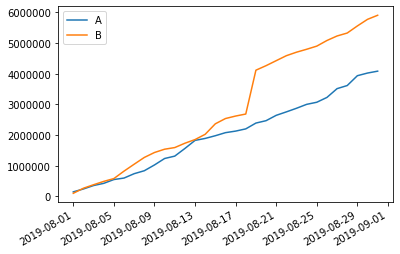

In [15]:
# срез с кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

# срез с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
fig = plt.figure()
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

fig.autofmt_xdate()
plt.legend()

Построим график кумулятивной выручки по дням и группам A/B-тестирования.  
Видим хорошую тенденцию: выручка увеличивается практически равномерно в течение всего теста. При этом группа А отличается большей плавностью, а в группе В присутствует резкий подъем между 17 и 21 августа. Это может свидетельствовать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### <a id='graph_of_the_cumulative_check'></a>График кумулятивного чека по группам

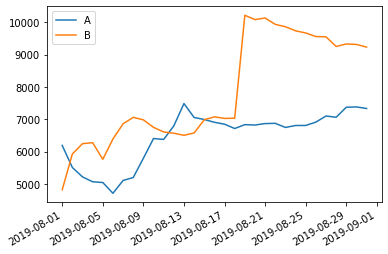

In [16]:
# делим кумулятивную выручку на кумулятивное число заказов, строим график
fig = plt.figure()
plt.plot(cummulativeRevenueA['date'],\
         cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'],\
         cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
fig.autofmt_xdate()
plt.legend()

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.  
Средний чек очень нестабилен; к концу теста он имеет тенденцию к большей равномерности, но еще не приходит к ней. Значит, нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.  
В группе В между 17 и 21 августа видим наиболее резкий подъем. На конец теста мы видим, что для группы А средний чек стремится закрепиться на высокой относительно предыдущего развития позиции, а для группы В - наоборот, имеет тенденцию к падению. 

#### <a id='graph_of_the_cumulative_relative_check'></a>График относительного изменения кумулятивного среднего чека группы B к группе A.

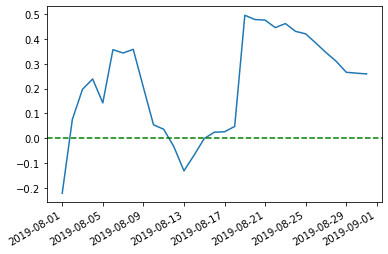

In [17]:
# соединим кумулятивные данные А и В
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB,\
                                left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig = plt.figure()
plt.plot(mergedCummulativeRevenue['date'],\
(mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue\
 ['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

# добавляем пунктирную ось X
plt.axhline(y=0, color='green', linestyle='--')
fig.autofmt_xdate()

Построим график относительного различия для среднего чека группы B к группе A. Добавим горизонтальную ось методом axhline().  
Наблюдаем постонные резкие скачки графика - скорее всего, это выбросы.  
В целом, значения тяготеют к более высоким показателям, чем в начале теста.

#### <a id='graph_of_the_cumulative_conversion'></a>График  кумулятивной конверсии по группам.

['2019-08-01', '2019-08-31', 0.025, 0.04]

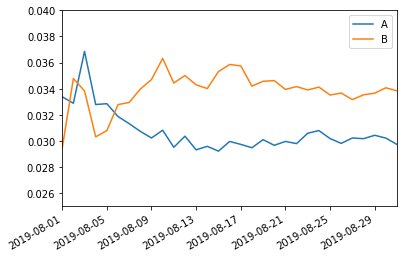

In [18]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

# строим графики
fig = plt.figure()
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
fig.autofmt_xdate()
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.025, 0.040])

Построим график кумулятивной конверсии. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y.  
В начале теста кумулятивная конверсия была выше в группе А, но затем группы поменялись местами, и группа В стала занимать стабильно более высокое положение. Оба графика еще не совсем зафиксировались: в них наблюдаются колебания, хотя общая тенденция видна хорошо и, скорее всего, уже не изменится.

#### <a id='relative_change_of_the_cumulative_conversion'></a>График  относительного изменения кумулятивной конверсии группы B к группе A.

['2019-08-01', '2019-08-31', -0.6, 0.6]

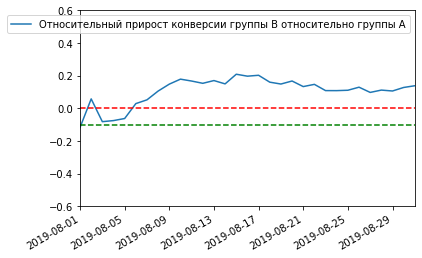

In [19]:
# соединим кумулятивные конверсии А и В
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge\
(cummulativeDataB[['date','conversion']], left_on='date', right_on='date',\
how='left', suffixes=['A', 'B'])

#строим график
fig = plt.figure()
plt.plot(mergedCummulativeConversions['date'],\
mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")
fig.autofmt_xdate()
plt.legend()

#задаем стиль осей
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=-0.1, color='green', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6])

Изучим график  относительного изменения кумулятивной конверсии группы B к группе A.
В начале теста конверсия в группе В показывала результат ниже, чем в группе А, но затем ее показатели стали расти и оставались на более высоком уровне до конца теста, незначительно колеблясь. Возможно, ее конверсия практически установилась и не будет претерпевать значительных изменений.

 #### <a id='scatter_orders_by_users'></a>Точечный график количества заказов по пользователям.

In [20]:
# оставим в таблице только id пользователей и заказы
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby\
('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

# назначим имена столбцов
ordersByUsers.columns = ['visitorId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Подсчитаем количество заказов по пользователям, отсортируем по убыванию. Некоторые пользователи делали довольно много заказов - до 11.

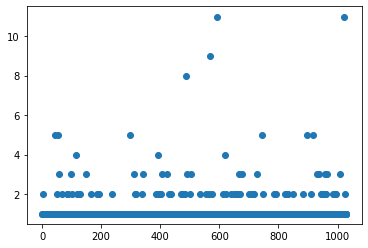

In [21]:
# строим график по количеству заказов и пользователям
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

Построим точечную диаграмму числа заказов на одного пользователя.   
Большинство делало по одному заказу, многие - 2, также немало значений с 3 заказами.  

In [22]:
# определяем перцинтили
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Посчитаем выборочные перцентили количества заказов на одного пользователя.  
Получилось не более 5% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали более одного раза. Можно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

 #### <a id='scatter_orders_cost'></a>Точечный график стоимостей заказов.

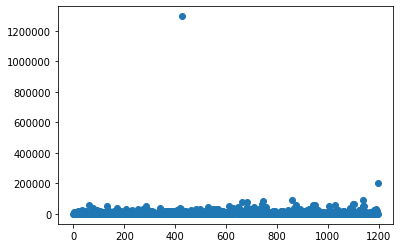

In [23]:
# строим график по количеству заказов и выручке
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Построим точечный график стоимости заказов по пользователям.   
Видим, что выбивающихся по цене заказов совсем немного. 

In [24]:
# определяем перцинтили
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Определим 90, 95 и 99 перцентили среднего чека в выборке. Получили не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей.

#### <a id='stat_diff_conversion_crude'></a>Статистическая значимость различий в конверсии между группами по «сырым» данным.

In [25]:
# отсортируем группу А по датам
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# считаем кумулятивную конверсию в группе А
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date']\
                    <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# отсортируем группу В по датам
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# считаем кумулятивную конверсию в группе В
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date']\
                    <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# заказы в группе А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# кумулятивные заказы в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# заказы в группе В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# кумулятивные заказы в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

stat_diff_conversion_crude = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

Отсортируем группы, посчитаем кумулятивную конверсию. Соединим данные в таблицу stat_diff_conversion_crude.

In [26]:
# отфильтруем число заказов группы А
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

# отфильтруем число заказов группы В
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей.  
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [27]:
# формируем переменную, исходя из количества заказов в группе А
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA']\
                            .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

# формируем переменную, исходя из количества заказов в группе В
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB']\
                            .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.  
Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B.  
Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный проигрыш группы B равен 13.8% — второе число в выводе.

#### <a id='stat_diff_check_crude'></a>Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [28]:
# используем критерий Манна-Уитни
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                          orders[orders['group']=='B']['revenue'])[1]))

# найдём относительные различия в среднем чеке между группами
print("{0:.3f}".format(orders[orders['group']=='B']['revenue']\
                       .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.  
Найдём относительные различия в среднем чеке между группами.  
P-value значительно больше 0.05 (0.365). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B ниже среднего чека группы A (0.259).

In [29]:
# зададим условия для фильтрации по количеству заказов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],\
                          ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)

# зададим условия для фильтрации по цене
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

# создадим таблицу
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)\
.drop_duplicates().sort_values()

# узнаем число аномальных пользователей
abnormalUsers.shape

(74,)

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape().  
Получили 74 аномальных пользователя.

#### <a id='stat_diff_conversion_refined'></a>Статистическая значимость различий в конверсии между группами по «очищенным» данным.

In [30]:
# отсеем аномальных пользователей из группы А
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']\
.isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA']\
                                    .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

# отсеем аномальных пользователей из группы В
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']\
.isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB']\
                                    .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

# применим критерий Манна-Уитни
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.173


Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.  
Применим статистический критерий Манна-Уитни к полученным выборкам.  
Результаты изменились незначительно в первом показателе (0.007 по сравнению с 0.008) и чуть ощутимее - во втором (0.173 по сравнению с 0.138 в неочищенных данных).

#### <a id='stat_diff_check_refined'></a>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [31]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId']\
                                                .isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.369
-0.020


Изучим статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
Здесь получили очень близкий первый показатель (увеличился до 0.369 по сравнению с 0.365) и сильно отличающийся второй (-0.020 по сравнению с 0.259 в неочищенных данных). Разница между сегментами сократилась с 25% до -2%, то есть средний чек группы В немного превысил чек группы А.

#### <a id='decision'></a>Решение по результатам теста.

Из проделанной работы можно сделать следующие выводы:
 * Статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий почти нет;
 * Средний чек группы B в очищенных данных превысил средний чек группы A;
 * График различия конверсии между группами сообщает, что показатели группы В стали расти и оставались на более высоком уровне до конца теста, незначительно колеблясь. Вероятно, ее конверсия практически установилась и не будет претерпевать значительных изменений;
 * График различия среднего чека говорит о том, что результаты группы B улучшаются, тяготеют к более высоким показателям, чем в начале теста;
 * По графику кумулятивной конверсии видно, что группа В стала занимать стабильно более высокое положение, чем А. Общая тенденция видна хорошо и, скорее всего, уже не изменится.
 
Исходя их обнаруженных фактов, тест следует остановить и зафиксировать победу группы В.